## CSV (Countries CO2 Emissions)

In [129]:
#DOWNLOADING DATA

#Run this in the terminal first to get the sample data:
#%%bash mkdir -p data curl -s https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/02-Data-Sourcing/co2_sample.csv > data/co2_sample.csv head -n 5 data/co2_sample.csv

In [132]:
#IMPORTING WITH PANDAS

#NOTE THIS IS JUST A SAMPLE
import pandas as pd
emissions_df = pd.read_csv('data/co2_sample.csv')
emissions_df

# #NOTE THIS IS THE FULL DATA csv downloaded from GapMinder
# import pandas as pd
# emissions_df = pd.read_csv('data/co2_pcap_cons.csv')
# emissions_df

# There can be different parameters based on the csv format
# emissions_df = pd.read_csv('data/co2_sample.csv',index_col=0)
# emissions_df

,country,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284
1,Angola,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230
2,Albania,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100
3,Andorra,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910
4,UAE,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100
5,Argentina,4.300,4.600,4.270,4.310,3.950,3.720,3.520,3.770,3.850
6,Armenia,2.000,2.030,1.920,2.020,2.490,2.450,2.570,2.730,2.700
7,Antigua and Barbuda,5.710,5.840,5.900,5.890,5.880,5.860,5.440,5.820,5.940
8,Australia,16.200,16.000,15.300,15.300,14.600,14.200,13.700,13.700,13.900
9,Austria,11.100,10.300,10.600,10.400,10.300,10.000,9.070,9.290,9.200


In [101]:
# We see in the table above that country names aren't consistent
!curl -s https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/02-Data-Sourcing/iso2_with_region.csv > data/iso2_with_region.csv
iso_df = pd.read_csv('data/iso2_with_region.csv', na_filter=False) #necessary because NA from Namibia is considered null LOL
iso_df.head()

,Name,Code,Full Name,Region
0,Afghanistan,AF,Afghanistan,Asia
1,Åland Islands,AX,Åland Islands,Europe
2,Albania,AL,Albania,Europe
3,Algeria,DZ,Algeria,Africa
4,American Samoa,AS,American Samoa,Oceania


In [102]:
emissions_df2 = emissions_df.merge(iso_df, left_on='country', right_on='Name')
emissions_df2.head()

,country,2014,2015,2016,2017,2018,2019,2020,2021,2022,Name,Code,Full Name,Region
0,Afghanistan,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284,Afghanistan,AF,Afghanistan,Asia
1,Angola,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230,Angola,AO,Angola,Africa
2,Albania,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100,Albania,AL,Albania,Europe
3,Andorra,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910,Andorra,AD,Andorra,Europe
4,UAE,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100,UAE,AE,UAE,Asia


In [103]:
emissions_df3 = emissions_df2.drop(columns=['country'])
emissions_df3

,2014,2015,2016,2017,2018,2019,2020,2021,2022,Name,Code,Full Name,Region
0,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284,Afghanistan,AF,Afghanistan,Asia
1,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230,Angola,AO,Angola,Africa
2,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100,Albania,AL,Albania,Europe
3,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910,Andorra,AD,Andorra,Europe
4,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100,UAE,AE,UAE,Asia
5,4.300,4.600,4.270,4.310,3.950,3.720,3.520,3.770,3.850,Argentina,AR,Argentina,Americas
6,2.000,2.030,1.920,2.020,2.490,2.450,2.570,2.730,2.700,Armenia,AM,Armenia,Asia
7,5.710,5.840,5.900,5.890,5.880,5.860,5.440,5.820,5.940,Antigua and Barbuda,AG,Antigua and Barbuda,Americas
8,16.200,16.000,15.300,15.300,14.600,14.200,13.700,13.700,13.900,Australia,AU,Australia,Oceania
9,11.100,10.300,10.600,10.400,10.300,10.000,9.070,9.290,9.200,Austria,AT,Austria,Europe


In [104]:
# In practice we do this - but note it will overwrite the df :)
emissions_df = emissions_df.merge(iso_df, left_on='country', right_on='Name')
emissions_df = emissions_df.drop(columns=['country'])
emissions_df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,Name,Code,Full Name,Region
0,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284,Afghanistan,AF,Afghanistan,Asia
1,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230,Angola,AO,Angola,Africa
2,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100,Albania,AL,Albania,Europe
3,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910,Andorra,AD,Andorra,Europe
4,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100,UAE,AE,UAE,Asia
5,4.300,4.600,4.270,4.310,3.950,3.720,3.520,3.770,3.850,Argentina,AR,Argentina,Americas
6,2.000,2.030,1.920,2.020,2.490,2.450,2.570,2.730,2.700,Armenia,AM,Armenia,Asia
7,5.710,5.840,5.900,5.890,5.880,5.860,5.440,5.820,5.940,Antigua and Barbuda,AG,Antigua and Barbuda,Americas
8,16.200,16.000,15.300,15.300,14.600,14.200,13.700,13.700,13.900,Australia,AU,Australia,Oceania
9,11.100,10.300,10.600,10.400,10.300,10.000,9.070,9.290,9.200,Austria,AT,Austria,Europe


## APIs

### Simple API (Github)

In [105]:
#library for APi requests
import requests

url = 'https://api.github.com/users/ssaunier'
response = requests.get(url)
response
# response.status_code

<Response [200]>

In [106]:
response.json()

{'login': 'ssaunier',
 'id': 414418,
 'node_id': 'MDQ6VXNlcjQxNDQxOA==',
 'avatar_url': 'https://avatars.githubusercontent.com/u/414418?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/ssaunier',
 'html_url': 'https://github.com/ssaunier',
 'followers_url': 'https://api.github.com/users/ssaunier/followers',
 'following_url': 'https://api.github.com/users/ssaunier/following{/other_user}',
 'gists_url': 'https://api.github.com/users/ssaunier/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/ssaunier/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/ssaunier/subscriptions',
 'organizations_url': 'https://api.github.com/users/ssaunier/orgs',
 'repos_url': 'https://api.github.com/users/ssaunier/repos',
 'events_url': 'https://api.github.com/users/ssaunier/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/ssaunier/received_events',
 'type': 'User',
 'user_view_type': 'public',
 'site_admin': False,
 'name': 'Sébas

In [107]:
response.json()['name']

'Sébastien Saunier'

In [108]:
response.headers

{'Date': 'Sat, 05 Jul 2025 16:36:21 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"f24467eb6babc5aa5cd009c3a1d8164cb7754befafb2c9aad9abf57ce29856ea"', 'Last-Modified': 'Thu, 06 Mar 2025 14:50:56 GMT', 'X-GitHub-Media-Type': 'github.v3; format=json', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, s

In [109]:
response.headers['Content-Type']

'application/json; charset=utf-8'

### More complex API (The World Bank)

In [110]:
import requests  # Import the requests library to make HTTP requests

country = 'BE'   # ISO country code (Belgium in this case)
year = 2023      # Year for which we want population data

# Construct the API endpoint URL using the country code in an f string
url = f"https://api.worldbank.org/v2/country/{country}/indicator/SP.POP.TOTL"

# Define query parameters: we want JSON format and a specific year
params = {
    'format': 'json',
    'date': year
}

# Send a GET request to the World Bank API with the given parameters
response = requests.get(url=url, params=params)

# Parse the JSON response
result = response.json()

result
#result is a list with two elements:
# result[0] = metadata about the request 
# result[1] = a list of actual data entries (here: one population data point) = a list of dicts (in this case, just one dict for Belgium 2023)
# result[1][0] =  the first dict inside that list
# result[1][0]['value'] = where the population is stored under key named "value" :)

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 1,
  'sourceid': '2',
  'lastupdated': '2025-07-01'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BE', 'value': 'Belgium'},
   'countryiso3code': 'BEL',
   'date': '2023',
   'value': 11787423,
   'unit': '',
   'obs_status': '',
   'decimal': 0}]]

In [111]:
# Extract and print the population value for the given country and year
print(result[1][0]['value'])

11787423


In [112]:
def fetch_population(country, year):
    # Define the API endpoint with the country code and population indicator
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/SP.POP.TOTL"

    # Set query parameters: format as JSON and filter by year
    params = {
        'format': 'json',
        'date': year
    }

    # Make the GET request to the World Bank API
    response = requests.get(url=url, params=params)

    # Check if the HTTP response was successful (status code 200)
    if response.status_code != 200:
        print(f"Error for {country} - {year}: status code {response.status_code}")
        return None

    # Parse the response JSON
    result = response.json()

    # Check if the API returned valid data (avoid empty or malformed response)
    if len(result) == 1 or not result[1]:
        print(f"Error for {country} - {year}: {result}")
        return None

    # Return the population value from the response
    return result[1][0]['value']

In [113]:
fetch_population('BE', 2023)

11787423

## Going back to CO2 Emissions vs Population

In [114]:
# IPython magic: measures how long this whole cell takes to run
%time
for index, row in emissions_df.head(3).iterrows():
    # Loop over the first 3 rows of the emissions_df DataFrame - we just want a sample here to check if it works
    # Print which country you're fetching data for
    # Remember, we had the country code already in the CO2 emissions CSV 
    #... which is what's used in the API url from WDB ;)
    
    print(f"Fetching population for {row['Name']} - {row['Code']}")
    
    # Call the fetch_population function for that country and year
    population = fetch_population(row['Code'], 2022)
    
    # Update the 'Population' column in the emissions DataFrame at that row
    emissions_df.loc[index, 'Population'] = population


CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 5.72 μs
Fetching population for Afghanistan - AF
Fetching population for Angola - AO
Fetching population for Albania - AL


In [115]:
#All good for sample of 3 ... now let's go full on!
for index, row in emissions_df.iterrows():
    print(f"Fetching population for {row['Name']} - {row['Code']}")
    population = fetch_population(row['Code'], 2022)
    emissions_df.loc[index, 'Population'] = population

Fetching population for Afghanistan - AF
Fetching population for Angola - AO
Fetching population for Albania - AL
Fetching population for Andorra - AD
Fetching population for UAE - AE
Fetching population for Argentina - AR
Fetching population for Armenia - AM
Fetching population for Antigua and Barbuda - AG
Fetching population for Australia - AU
Fetching population for Austria - AT


## Let's clean up our tables before saving ....

In [116]:
emissions_df.head(2)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,Name,Code,Full Name,Region,Population
0,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284,Afghanistan,AF,Afghanistan,Asia,40578842.0
1,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230,Angola,AO,Angola,Africa,35635029.0


In [117]:
# Make a list of column names, starting with the country identification
new_order = ['Code', 'Name', 'Full Name', 'Region', 'Population']

In [118]:
# Add the columns for the years
new_order += list(emissions_df.columns)[:-5]
new_order

['Code',
 'Name',
 'Full Name',
 'Region',
 'Population',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [119]:
# Use the list to reorder the dataframe
emissions_df = emissions_df[new_order]
emissions_df.head(2)

,Code,Name,Full Name,Region,Population,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AF,Afghanistan,Afghanistan,Asia,40578842.0,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284
1,AO,Angola,Angola,Africa,35635029.0,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230


In [122]:
#NOW I save!
emissions_df.to_csv("data/emissions_enriched.csv", index=False)
#Don't add another index -> index = false

In [124]:
#check the output
!head -n 2 data/emissions_enriched.csv

Code,Name,Full Name,Region,Population,2014,2015,2016,2017,2018,2019,2020,2021,2022
AF,Afghanistan,Afghanistan,Asia,40578842.0,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284


## Now let's analyse the data!

In [125]:
# Keep relevant columns only, incl. emissions for 2022 only
emissions_2022 = emissions_df[['Full Name', 'Region', '2022', 'Population']].copy()
# Calculate total emissions = emissions per capita x population
emissions_2022["Total Emissions"] = emissions_2022["2022"] * emissions_2022["Population"]
# Rename the 2022 column
emissions_2022 = emissions_2022.rename(columns={'2022': 'Emissions Per Capita'})
emissions_2022.head()

,Full Name,Region,Emissions Per Capita,Population,Total Emissions
0,Afghanistan,Asia,0.284,40578842.0,1.152439e+07
1,Angola,Africa,1.230,35635029.0,4.383109e+07
2,Albania,Europe,2.100,2777689.0,5.833147e+06
3,Andorra,Europe,5.910,79705.0,4.710565e+05
4,UAE,Asia,21.100,10074977.0,2.125820e+08


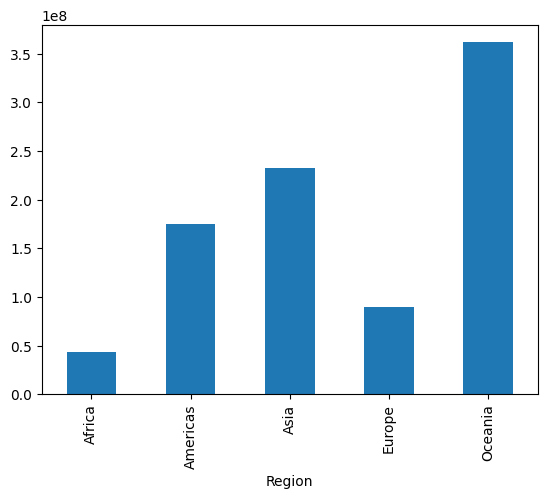

In [127]:
emissions_2022.groupby("Region")["Total Emissions"].sum().plot(kind='bar');
#semi column ensures it looks better

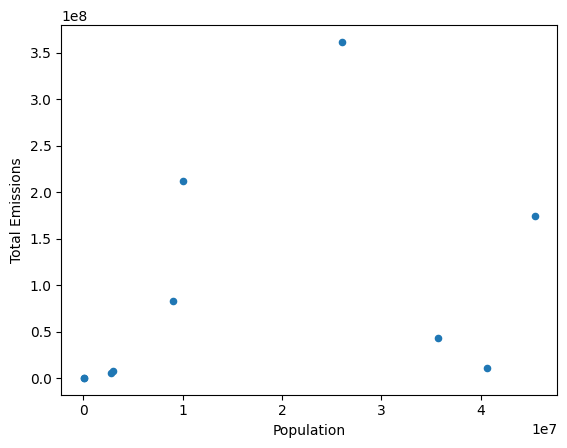

In [128]:
# Do a quick scatter plot of one variable against each other
emissions_2022.plot.scatter("Population", "Total Emissions");

## Appendix

In [133]:
# faster way to run the API
# In the url we just replace "{country}" by "all"
url = f"https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL"

params = {
    'format': 'json',
    'date': year
}

response = requests.get(url=url, params=params).json()
print(f"We have {len(response[1])} countries in our result.")
response

We have 50 countries in our result.


[{'page': 1,
  'pages': 6,
  'per_page': 50,
  'total': 266,
  'sourceid': '2',
  'lastupdated': '2025-07-01'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
   'countryiso3code': 'AFE',
   'date': '2023',
   'value': 750503764,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'ZI', 'value': 'Africa Western and Central'},
   'countryiso3code': 'AFW',
   'date': '2023',
   'value': 509398589,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': '1A', 'value': 'Arab World'},
   'countryiso3code': 'ARB',
   'date': '2023',
   'value': 482105978,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'S3', 'value': 'Caribbean smal

In [134]:
# Result is paginated! So we will run a query on 6 pages in a loop
# Make sure there is a functiona;l break as we run out of pages
# Create empty lists as placeholders for the codes, names and populations
country_codes = []
country_names = []
populations = []

# Start at page 1 and start a while loop (we don't know how many pages we'll get)
page = 1
while True:
    url = f"https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL"

    params = {
        'format': 'json',
        'date': year,
        'page': page   # This is new: we pass the page we want as a param
    }

    response = requests.get(url=url, params=params).json()

    # Add the codes, names and populations to our placeholders
    country_codes.extend([result['country']['id'] for result in response[1]])
    country_names.extend([result['country']['value'] for result in response[1]])
    populations.extend(result['value'] for result in response[1])

    # Check if this wasn't the last page
    if page == response[0]['pages']:
        break
    # Get ready for the next page
    page += 1

In [136]:
# We get the same result but instead of running hundreds of request, we ran 6 :)
population_df = pd.DataFrame({
    'Code': country_codes,
    'Name': country_names,
    'Population': populations
})
population_df.sort_values('Name')

,Code,Name,Population
49,AF,Afghanistan,4.145476e+07
0,ZH,Africa Eastern and Southern,7.505038e+08
1,ZI,Africa Western and Central,5.093986e+08
50,AL,Albania,2.745972e+06
51,DZ,Algeria,4.616422e+07
...,...,...,...
262,PS,West Bank and Gaza,5.165775e+06
48,1W,World,8.064977e+09
263,YE,"Yemen, Rep.",3.939080e+07
264,ZM,Zambia,2.072396e+07
